Importar Librerías

In [1]:
import pandas as pd
from tqdm.notebook import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Definición de lexicon a ocupar

In [ ]:
# from translate import Translator

# def translate_text(text, target_language='es'):
#     translator= Translator(to_lang=target_language)
#     translation = translator.translate(text)
#     return translation

# lexicon_en = pd.read_csv('lexicon_en.txt', sep='	', header=None)
# lexicon_en.columns = ['text','polarity','affinity','relay']

# text_es = pd.read_csv('just_titles.txt', sep='	', index_col=0, header=0, encoding='latin1')

# lexicon_es = lexicon_en.merge(text_es, right_index=True, left_index=True, how='left')

# lexicon_es['final_text'] = lexicon_es['texto'].fillna(lexicon_es['text'])

# lexicon_es.to_csv('lexicon_es.txt', columns=['final_text','polarity','affinity','relay'], sep='\t', header=None, index=False)
# lexicon_es

Definición dataset + sentiment analyzer

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

sentiment_analyzer = SentimentIntensityAnalyzer(lexicon_file='C:/Users/alniquia/OneDrive - Telefonica/Documents/Projects/cc_sentiment_analysis/lexicon_es.txt')

# Concatenar las busquedas de los tweets
years = [2019, 2020, 2021, 2022]

months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

conceptos=['Convencion_Constitucional',
	'Proceso_Constituyente',
	'Nueva_Constitucion',
	'Convencion_Constituyente']

tweets = pd.DataFrame()

for year in years:
	for month in months:
		for concepto in conceptos:
			try:
				newtweets = pd.read_parquet('datasets/' + str(year) + '/' + concepto + '_' + str(year) + '_' + str(month) + '.parquet')
				newtweets['archivo'] = concepto + '_' + str(year) + '_' + str(month) + '.parquet'
				newtweets['keyword'] = concepto
				newtweets['date_day'] = newtweets['date'].dt.date.astype('datetime64[ns]')
				newtweets['date_week'] = newtweets['date'].dt.strftime('%Y-%W')
				newtweets['date_month'] = newtweets['date'].dt.strftime('%Y-%m')
				tweets = pd.concat([tweets, newtweets])
				print('Agregado ' + concepto + '_' + str(year) + '_' + str(month) + '.parquet -> ' + str(len(newtweets)) + ' tweets')
			except:
				print('No se encuentra ' + concepto + '_' + str(year) + '_' + str(month) + '.parquet')

tweets = tweets[~tweets.index.duplicated(keep='first')]
tweets = tweets.sort_values(by='date', ascending=True)
tweets.shape


No se encuentra Convencion_Constitucional_2019_1.parquet
No se encuentra Proceso_Constituyente_2019_1.parquet
No se encuentra Nueva_Constitucion_2019_1.parquet
No se encuentra Convencion_Constituyente_2019_1.parquet
No se encuentra Convencion_Constitucional_2019_2.parquet
No se encuentra Proceso_Constituyente_2019_2.parquet
No se encuentra Nueva_Constitucion_2019_2.parquet
No se encuentra Convencion_Constituyente_2019_2.parquet
No se encuentra Convencion_Constitucional_2019_3.parquet
No se encuentra Proceso_Constituyente_2019_3.parquet
No se encuentra Nueva_Constitucion_2019_3.parquet
No se encuentra Convencion_Constituyente_2019_3.parquet
No se encuentra Convencion_Constitucional_2019_4.parquet
No se encuentra Proceso_Constituyente_2019_4.parquet
No se encuentra Nueva_Constitucion_2019_4.parquet
No se encuentra Convencion_Constituyente_2019_4.parquet
No se encuentra Convencion_Constitucional_2019_5.parquet
No se encuentra Proceso_Constituyente_2019_5.parquet
No se encuentra Nueva_Cons

(2184496, 23)

Agregar polarity_score

In [ ]:
def polarity_score(sentence):
	sentiment = sentiment_analyzer.polarity_scores(sentence)
	return sentiment['neg'], sentiment['neu'], sentiment['pos'], sentiment['compound']

tweets[['negativity_score', 'neutrality_score', 'positivity_score', 'compound_score']] = tweets['rawContent'].apply(polarity_score).apply(pd.Series)

tweets[['date_day','rawContent','negativity_score', 'neutrality_score', 'positivity_score', 'compound_score']].sample(100)

In [13]:
pd.options.display.max_rows = 70
pd.options.display.max_colwidth = 1000
tweets[['date_day','rawContent','negativity_score', 'neutrality_score', 'positivity_score', 'compound_score']].sample(25)

,date_day,rawContent,negativity_score,neutrality_score,positivity_score,compound_score
id,,,,,,
1562555712990892032,2022-08-24,"[Breve 🧵]\n\n🧑‍🌾 ¿Cómo se aborda la alimentación en la nueva Constitución?\n\nLa alimentación es un Derecho Humano y actualmente en Chile no se encuentra garantizado a nivel constitucional, https://t.co/0SWPO2abos",0.041,0.904,0.055,0.1280
1503423063324385285,2022-03-14,"@ignaciowalker Uno de los amarillos por Chile plantea una prórroga de tres meses más. Pará que la convención ""reflexione"" y deliberen con ""tranquilidad"".Traductor Google, queremos una propuesta de nueva constitución parecida a la de la actual, sin grandes cambios.Esto porque no queremos perder",0.031,0.872,0.097,0.4692
1155559976053727232,2019-07-28,@EtxarriTonia Esa es otra cuestión. UP no es un partido afecto a la Constitución del 78 y quiere un proceso constituyente. Pero la oferta de Sanchez era excelente para UP aunque la coalición no fuese deseable para amplios sectores sociales y políticos,0.098,0.765,0.136,0.5911
1529264498615324672,2022-05-25,Fitch Ratings afirma que borrador de la nueva Constitución no despeja la incertidumbre y JP Morgan endurece sus críticas al texto https://t.co/FFlwvcOv2p vía @pulso_tw cuéntele a @DMatamala #RechazoEl4deSeptiembre,0.159,0.761,0.080,-0.1197
1320819239897485316,2020-10-26,"Briones: ""Las reglas del juego de 2/3 harán que tengamos una nueva Constitución moderada""\nEl ministro de Hacienda asegura en @pauta_cl que ""tenemos desafíos bien grandes y eso no se juega en la ingeniería de detalle de la Constitución"".\nhttps://t.co/iMYfKFZ1Ge",0.031,0.804,0.165,0.7184
1298460259963543552,2020-08-26,"@guillier Jajajajajajaja y convención constituyente!! Por favor MEO, ten algo de orgullo y retírate.",0.000,0.671,0.329,0.7081
1315717234866651136,2020-10-12,"@someone09734601 @huacha_roja Nadie dijo eso, la nueva Constitución da paso a hacer cambios, nos garantiza derechos, y limita la corrupción de los políticos, nada más. Las futuras reformas en la educación se podrán hacer pero sólo si se cambia la Constitución, la actual no lo permite.",0.030,0.970,0.000,-0.1027
1232136157913329664,2020-02-25,"@jpvc88 A mi me han dicho hasta el cansancio, desde el rechazo, que la nueva Constitución no va a solucionar todos los problemas. Por eso mismo se sigue protestando, para que nada se nos quede en el tintero.",0.234,0.766,0.000,-0.8555
1545968674942595072,2022-07-10,@Mirk_T Nada mejor describe la nueva constitución 🤭🤭🤭🤭 castillos en el aire 😂😂😂😂,0.000,0.742,0.258,0.9432


Visualización

In [ ]:
sns.set_style('whitegrid')
sns.set_palette('afmhot')

fig, ax = plt.subplots(figsize=(14, 8))
sns.heatmap(data=tweets[['date_day','compound_score']], ax=ax, alpha=0.5)
plt.show()

In [ ]:
# fechas relevantes convencion constitucional
fechas_relevantes = {
	'fecha': '2019-11-15', 'evento': 'acuerdo por la nueva constitucion',
	'fecha': '2020-08-26', 'evento': 'inicio periodo de campaña y propaganda electoral',
	'fecha': '2020-09-25', 'evento': 'inicio franja televisiva',
	'fecha': '2020-10-22', 'evento': 'fin periodo de campaña y propaganda electoral',
	'fecha': '2020-10-25', 'evento': 'plebicito constitucional de entrada',
	'fecha': '2021-02-11', 'evento': 'inicio periodo de campaña y propaganda electoral',
	'fecha': '2021-04-11', 'evento': 'elecciones miembros de la convención constitucional',
	'fecha': '2021-11-21', 'evento': 'primera vuelta presidencial',
	'fecha': '2021-12-19', 'evento': 'segunda vuelta presidencial',
	'fecha': '2022-07-06', 'evento': 'inicio periodo de campaña y propaganda electoral',
	'fecha': '2022-08-05', 'evento': 'inicio franja televisiva',
	'fecha': '2022-08-20', 'evento': 'fin divulgación resultados de encuestas',
	'fecha': '2022-09-04', 'evento': 'plebicito constitucional',
}

C:\Users\alniquia\AppData\Local\Temp\ipykernel_4012\1645401963.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(avg_week.index, rotation=90)


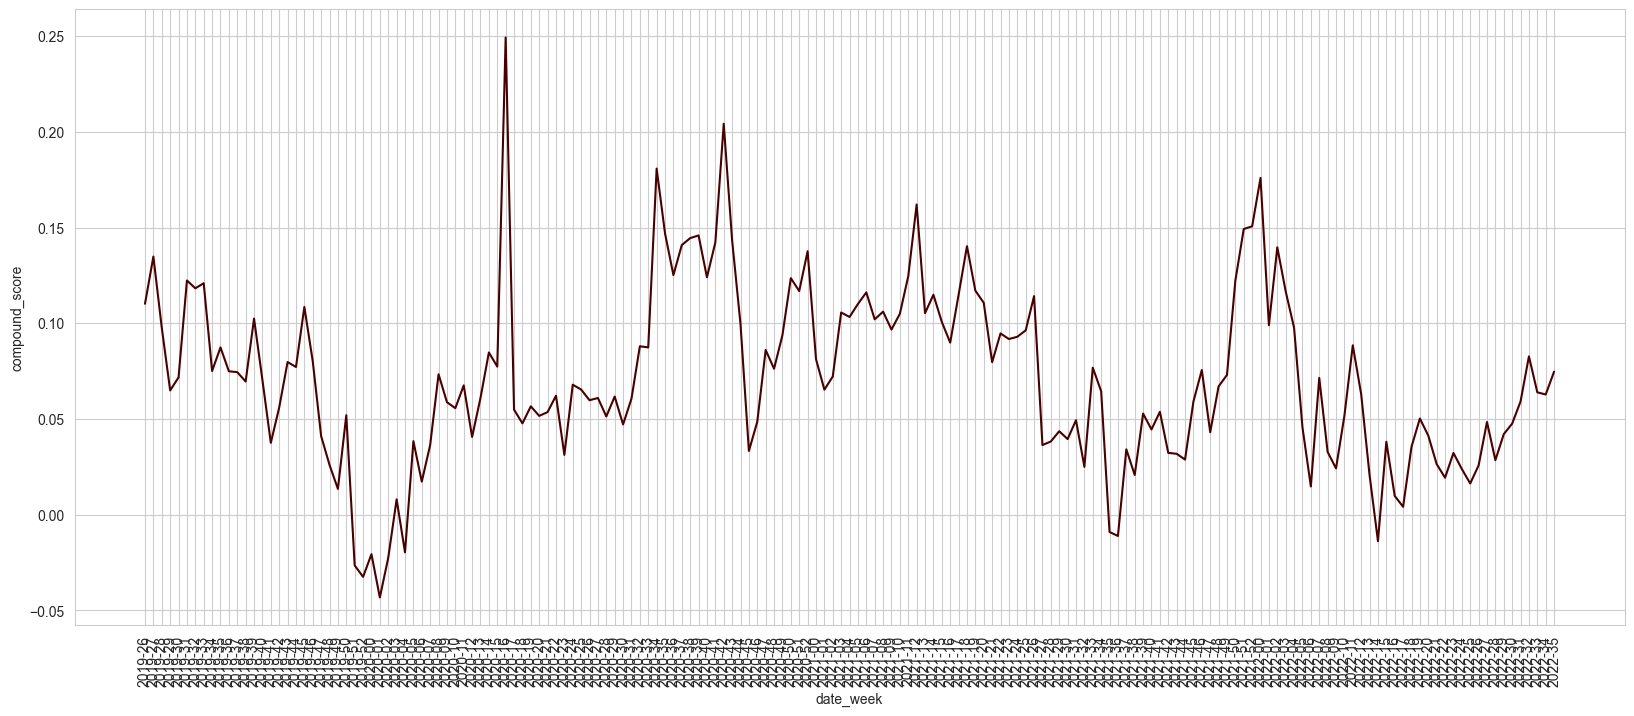

In [19]:
# plot sentimiento semanal
avg_week = tweets[['date_week', 'compound_score']].groupby('date_week').mean()

fig, ax = plt.subplots(figsize=(20, 8))
sns.lineplot(x=avg_week.index, y='compound_score', data=avg_week, ax=ax)

ax.set_xticklabels(avg_week.index, rotation=90)

plt.show()